Integrantes:  


*   Héctor Velázquez
*   Derlis Sanabria



In [ ]:
pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math

In [ ]:
class Red:
    def __init__(self):
        self.grafo = nx.DiGraph()

    def add_arista(self, u, v, distancia, ancho_banda, retardo, perdida_paquetes):
        self.grafo.add_edge(u, v, distancia=distancia, ancho_banda=ancho_banda, retardo=retardo, perdida_paquetes=perdida_paquetes)

    def dijkstra(self, fuente, destino):
        dist = {nodo: float('inf') for nodo in self.grafo.nodes} #distancia vertice a vertice siguiente es infinito
        dist[fuente] = 0 #distancia vertice fuente a si mismo es 0
        prev = {nodo: None for nodo in self.grafo.nodes} #dic almacena nodos previos en el camino mas corto todo none al inicio
        #diccionario que guardan QOS acumulado en el camino desde la fuente a cada nodo del grafo
        ancho_banda = {nodo: float('inf') for nodo in self.grafo.nodes} #infinito al inicio,  diccionario que almacena el ancho de banda acumulado en el camino más corto hacia cada nodo. Inicialmente, todos los valores son infinitos.
        retardo = {nodo: 0 for nodo in self.grafo.nodes}#Diccionario que almacena el retardo acumulado en el camino más corto hacia cada nodo. Inicialmente, todos los valores son 0.
        L_prime = {nodo: 0.0 for nodo in self.grafo.nodes}#Diccionario que acumula la pérdida de paquetes a lo largo del camino. Inicialmente, todos los valores son 0.

       #Inicialización de nodos pendientes
        nodos_pendientes = list(self.grafo.nodes)#lista que contiene nodos cuyas distancias más cortas desde el nodo fuente aún no se han determinado.

        #bucle principal, mientras nodo pendiente no este vacío
        while nodos_pendientes: #si hay nodos por revisar se ejecuta el bucle

            nodo_actual = min(nodos_pendientes, key=lambda nodo: dist[nodo]) #se compara distancia con min y lambda y se asigna a nodo actual
            nodos_pendientes.remove(nodo_actual) #se quita de nodos pendientes
        #Condicion de parada
        #Si la distancia al nodo_actual es infinita, se rompe el bucle porque no hay más nodos alcanzables.
            if dist[nodo_actual] == float('inf'): # si no existe otro nodo despues , salir de la funcion
                break
        #Iteración en los vecinos del nodo actual
            for vecino in self.grafo.neighbors(nodo_actual):# para cada vecino en el vertice actual
                arista = self.grafo[nodo_actual][vecino] #se guarda la arista  que conecta el vertice actual con "vecino"
                alt = dist[nodo_actual] + arista['distancia'] #nueva distancia nodo actual a vecino
                if alt < dist[vecino]: #si alt es menor que la distancia dist[vecino], se actualizan valores
                    dist[vecino] = alt
                    prev[vecino] = nodo_actual#prev[vecino] con nodo_actual (indicando que el camino más corto a vecino pasa por nodo_actual)
                    ancho_banda[vecino] = min(ancho_banda[nodo_actual], arista['ancho_banda'])
                    retardo[vecino] = retardo[nodo_actual] + arista['retardo']
                    L_prime[vecino] = L_prime[nodo_actual] + arista['perdida_paquetes']

        #si dist[destino] sigue siendo infinito.
        #Si es así, significa que no hay camino desde fuente hasta destino, y la función devuelve None y valores infinitos para las métricas.
        if dist[destino] == float('inf'):
            return None, float('inf'), float('inf'), float('inf'), float('inf')
        camino = []   #almacenar los nodos en el orden correcto del camino más corto desde el nodo fuente hasta el nodo destino.
        u = destino#nodo hacia el cual queremos encontrar el camino más corto.
        while prev[u] is not None: #si prev[u] no esta vacio
            camino.insert(0, u)
            u = prev[u]
        camino.insert(0, u)

        # Calcular la probabilidad de pérdida de paquetes
        L = 1 - math.exp(L_prime[destino])
        return camino, dist[destino], ancho_banda[destino], retardo[destino], abs(L)

    def graficar(self):
        pos = nx.spring_layout(self.grafo)  # Usar spring_layout para distribución automática de los nodos
        edge_labels = {(u, v): f"{self.grafo[u][v]['distancia']}, {self.grafo[u][v]['ancho_banda']}, {self.grafo[u][v]['retardo']}, {self.grafo[u][v]['perdida_paquetes']}" for u, v in self.grafo.edges}

        # Dibuja el grafo con nodos y etiquetas
        nx.draw(self.grafo, pos, with_labels=True, node_size=300, node_color='green', font_size=6, font_weight='bold', arrowsize=10)

        # Dibuja las etiquetas de las aristas con ajuste de posición
        nx.draw_networkx_edge_labels(self.grafo, pos, edge_labels=edge_labels, font_size=6, label_pos=0.3, rotate=False)

        plt.title("Grafo de la Red con Métricas de QoS")
        plt.show()


ENTRADA:
PARES ORIGEN-DESTINO:
Path: 1-2-3
Distancia: 9
Ancho de Banda: 8
Retardo: 2
Probabilidad de PP: 0.0408
Path: 2-3-4-5
Distancia: 10
Ancho de Banda: 8
Retardo: 5
Probabilidad de PP: 0.0513
Path: 3-4-6
Distancia: 8
Ancho de Banda: 10
Retardo: 5
Probabilidad de PP: 0.0305


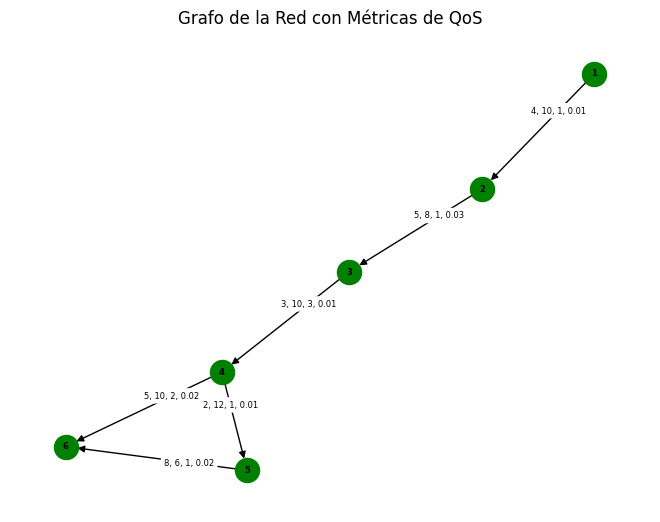

In [ ]:
# Datos de entrada directos
datos_entrada = [
    "6",
    "1 2 4 10 1 0.01", #(veritce 1 , vertice 2 , distancia entre vertices , ancho de banda , retardo , probabilidad)
    "2 3 5 8 1 0.03",
    "3 4 3 10 3 0.01",
    "4 5 2 12 1 0.01",
    "4 6 5 10 2 0.02",
    "5 6 8 6 1 0.02",
    "-1",
    "1 3", #origen - destino
    "2 5",
    "3 6",
    "-1"
]

# Lectura de la entrada
print("ENTRADA:")
mi_red = Red()
n = int(datos_entrada[0].strip())

for entrada in datos_entrada[1:]:
    if entrada.strip() == "-1":
        break
    u, v, distancia, ancho_banda, retardo, perdida_paquetes = entrada.split()
    mi_red.add_arista(u, v, int(distancia), int(ancho_banda), int(retardo), float(perdida_paquetes))

# Lectura de pares origen-destino y cálculo de las métricas
print("PARES ORIGEN-DESTINO:")
pares_origen_destino = datos_entrada[8:]  # Los pares origen-destino empiezan en el índice 8
for entrada in pares_origen_destino:
    if entrada.strip() == "-1":
        break
    fuente, destino = entrada.split()
    camino, distancia, ancho_banda, retardo, perdida_paquetes = mi_red.dijkstra(fuente, destino)
    if camino:
        print(f"Path: {'-'.join(camino)}")
        print(f"Distancia: {distancia}")
        print(f"Ancho de Banda: {ancho_banda}")
        print(f"Retardo: {retardo}")
        print(f"Probabilidad de PP: {perdida_paquetes:.4f}")
    else:
        print(f"No hay camino desde {fuente} hasta {destino}")

# Graficar el grafo
mi_red.graficar()

ENTRADA:
PARES ORIGEN-DESTINO:
Path: 1-2-3
Distancia: 9
Ancho de Banda: 8
Retardo: 2
Probabilidad de PP: 0.0408
Path: 2-3
Distancia: 5
Ancho de Banda: 8
Retardo: 1
Probabilidad de PP: 0.0305
Path: 4-2
Distancia: 2
Ancho de Banda: 12
Retardo: 1
Probabilidad de PP: 0.0101


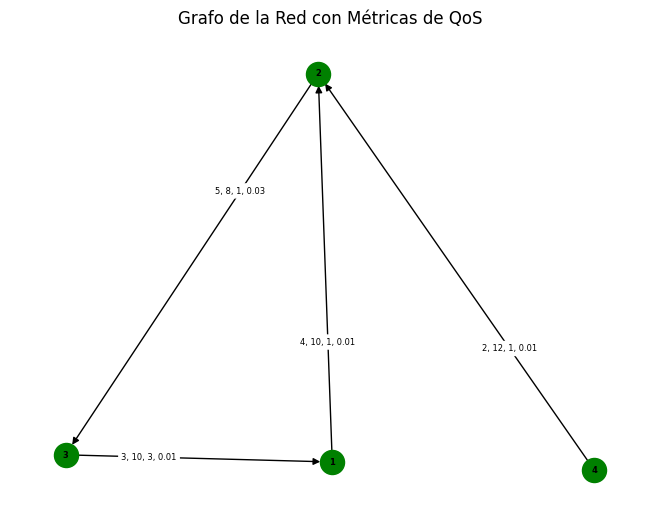

In [ ]:
# Datos de entrada directos
datos_entrada = [
    "3",
    "1 2 4 10 1 0.01", #(veritce 1 , vertice 2 , distancia entre vertices , ancho de banda , retardo , probabilidad)
    "2 3 5 8 1 0.03",
    "3 1 3 10 3 0.01",
    "4 2 2 12 1 0.01",
    "-1",
    "1 3",
    "2 3",
    "4 2",
    "-1"
]

# Lectura de la entrada
print("ENTRADA:")
mi_red = Red()
n = int(datos_entrada[0].strip())

for entrada in datos_entrada[1:]:
    if entrada.strip() == "-1":
        break
    u, v, distancia, ancho_banda, retardo, perdida_paquetes = entrada.split()
    mi_red.add_arista(u, v, int(distancia), int(ancho_banda), int(retardo), float(perdida_paquetes))

# Lectura de pares origen-destino y cálculo de las métricas
print("PARES ORIGEN-DESTINO:")
pares_origen_destino = datos_entrada[6:]  # Los pares origen-destino empiezan en el índice 5
for entrada in pares_origen_destino:
    if entrada.strip() == "-1":
        break
    fuente, destino = entrada.split()
    camino, distancia, ancho_banda, retardo, perdida_paquetes = mi_red.dijkstra(fuente, destino)
    if camino:
        print(f"Path: {'-'.join(camino)}")
        print(f"Distancia: {distancia}")
        print(f"Ancho de Banda: {ancho_banda}")
        print(f"Retardo: {retardo}")
        print(f"Probabilidad de PP: {perdida_paquetes:.4f}")
    else:
        print(f"No hay camino desde {fuente} hasta {destino}")

# Graficar el grafo
mi_red.graficar()

ENTRADA:
6
1 2 4 10 1 0.01
2 3 5 8 1 0.03
3 4 3 10 3 0.01
4 5 2 12 1 0.01
4 6 5 10 2 0.02 
5 6 8 6 1 0.02
-1
PARES ORIGEN-DESTINO:
1 3
Path: 1-2-3
Distancia: 9
Ancho de Banda: 8
Retardo: 2
Probabilidad de PP: 0.0408
2 5
Path: 2-3-4-5
Distancia: 10
Ancho de Banda: 8
Retardo: 5
Probabilidad de PP: 0.0513
3 6
Path: 3-4-6
Distancia: 8
Ancho de Banda: 10
Retardo: 5
Probabilidad de PP: 0.0305
-1


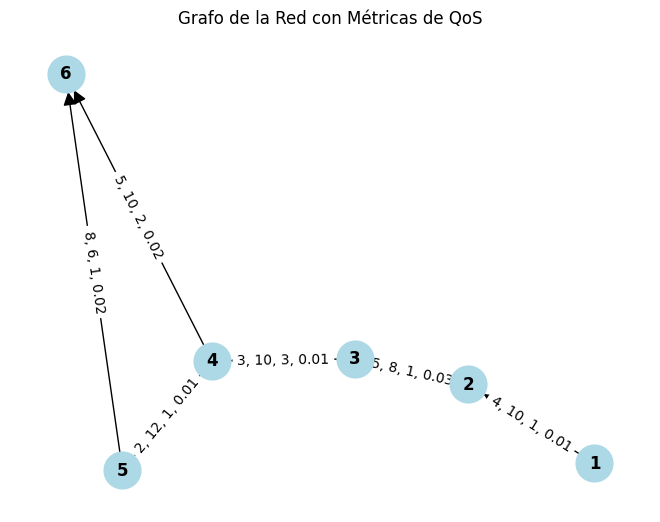

In [ ]:
# Lectura de la entrada
print("ENTRADA:")
mi_red2 = Red()
n = int(input().strip())
while True:
    entrada = input().strip()
    if entrada == "-1":
        break
    u, v, distancia, ancho_banda, retardo, perdida_paquetes = entrada.split()
    mi_red2.add_arista(u, v, int(distancia), int(ancho_banda), int(retardo), float(perdida_paquetes))

# Lectura de pares origen-destino y cálculo de las métricas
print("PARES ORIGEN-DESTINO:")
while True:
    entrada = input().strip()
    if entrada == "-1":
        break
    fuente, destino = entrada.split()
    camino, distancia, ancho_banda, retardo, perdida_paquetes = mi_red2.dijkstra(fuente, destino)
    if camino:
        print(f"Path: {'-'.join(camino)}")
        print(f"Distancia: {distancia}")
        print(f"Ancho de Banda: {ancho_banda}")
        print(f"Retardo: {retardo}")
        print(f"Probabilidad de PP: {perdida_paquetes:.4f}")
    else:
        print(f"No hay camino desde {fuente} hasta {destino}")

# Graficar el grafo
mi_red2.graficar()